# Statistical Analysis for Chapter 3



# Estimation

There are two data files one the 2020 ANES the other the pooled ANES. They only include a subset of variables, not the whole ANES. We create a function below that takes data, dependent variable, and independent.variable as input. The function creates a squared authoritarianism measure, and three data sets -- one corresponding to a particular group. Then a BRMS ordered logit is specificied. The function returns the model output for each group.

In [29]:
rm(list = ls())
options(warn = -1)

library(brms)
library(ggplot2)
library(modelr)
library(tidybayes)
library(dplyr)
library(cowplot)

setwd("/Users/Chris/Dropbox/github_repos/Authoritarianism_book/authoritarianism_uspolitics/")

source("functions/common_functions.r")
# Quiet warnings

load("clean_data/ch3ANES.rda")
load("clean_data/ch3ANES2000.rda")
ANES_2020 = data

## Policy Item Predictions, By Racial/Ethnic Group

In [ ]:
predPlot(data = ANES_2020, dependent.variable = "trans.military", plot.title = "Opposition to transgender people serving in military",
                        chains = 1, cores = 8, model = "logit_model", plot.y = "logit",
                        seed = 1234, iter = 1000, y.limits = c(0,0.65)) -> trans.military.plot

In [ ]:
predPlot(data = ANES_2020, dependent.variable = "gay.marriage", plot.title = "Opposition to legal recognition of same sex marriage",
                        chains = 1, cores = 8, plot.y = "logit",
                        seed = 1234, iter = 1000,
                        y.limits = c(0,0.45)) -> same.sex.plot

In [ ]:
predPlot(
  data = ANES_2020, dependent.variable = "moral.traditionalism", plot.title = "Moral Traditionalism",
  model = "linear_model", plot.y = "linear",
  chains = 1, cores = 8,
  seed = 1234, iter = 1000, y.limits = c(0, 0.8)
) -> moral.traditionalism.plot

In [ ]:
predPlot(data = ANES_2020, dependent.variable = "gay.discrimination", plot.title = "Oppose laws that protect gays from job discrimination",
                        chains = 1, cores = 8, plot.y = "logit",
                        seed = 1234, iter = 1000, y.limits = c(0, 0.4)) - gay.discrimination.plot

In [ ]:
predPlot(data = ANES_2020, dependent.variable = "immigrants", plot.title = "Oppose increasing immigration",
                        chains = 1, cores = 8,
                        seed = 1234, iter = 1000, y.limits = c(0, 0.6))

In [ ]:
predPlot(data = ANES_2020, dependent.variable = "aid.blacks", plot.title = "Oppose government assistance to Blacks",
                        chains = 1, cores = 8, plot.y = "logit",
                        seed = 1234, iter = 1000, y.limits = c(0, 0.6))

In [ ]:
predPlot(data = ANES_2020, dependent.variable = "abortion", plot.title = "Abortion should never be legal",
                        chains = 1, cores = 8, plot.y = "logit",
                        seed = 1234, iter = 1000, y.limits = c(0, 0.4))

In [ ]:
predPlot(data = ANES_2020, dependent.variable = "conservative", plot.title = "Identify as Conservative",
                        chains = 1, cores = 8,plot.y = "logit",
                        seed = 1234, iter = 1000, y.limits = c(0, 0.6))

In [ ]:
predPlot(data = ANES_2020, dependent.variable = "border.wall", plot.title = "Support building a border wall",
                        chains = 1, cores = 8, plot.y = "logit",
                        seed = 1234, iter = 1000, y.limits = c(0, 0.8)) -> border.wall.plot

In [ ]:
predPlot(data = ANES_2020, dependent.variable = "urban.unrest", plot.title = "Urban Unrest: 'Use all available force to maintain law and order'",
                        chains = 1, cores = 8,plot.y = "logit",
                        seed = 1234, iter = 1000, y.limits = c(0, 0.6))

In [ ]:
predPlot(data = ANES_2020, dependent.variable = "birthright.citizenship", plot.title = "Believe the U.S. should ending birthright citizenship",
                        chains = 1, cores = 8,plot.y = "logit",
                        seed = 1234, iter = 1000, y.limits = c(0, 0.5))

In [ ]:
predPlot(data = ANES_2020, dependent.variable = "dreamers", plot.title = "Believe the U.S. should send back unauthorized migrants ",
                        chains = 1, cores = 8,plot.y = "logit",
                        seed = 1234, iter = 1000, y.limits = c(0, 0.3))

### Moral Traditionalism and Affective Polarization

In [ ]:
predPlot(data = ANES_2020, dependent.variable = "moral.traditionalism", plot.title = "Moral Traditionalism",
                        model = "linear_model",plot.y = "linear",
                        chains = 1, cores = 8,
                        seed = 1234, iter = 1000, y.limits = c(0, 0.8))

In [ ]:
ANES_2020$polarization = ANES_2020$feeling.dem/100 - ANES_2020$feeling.rep/100
predPlot(data = ANES_2020, dependent.variable = "polarization", plot.title = "Affective Polarization (Feelings Democrat - Feelings Republican)",
                        model = "linear_model", plot.y = "linear",
                        chains = 1, cores = 8,
                        seed = 1234, iter = 1000, y.limits = c(-1, 1))

### Party Identification Over Time

In the chapter, we demonstrated that party identification was more heavily bound up in authoritarianism among Whites not minority groups. This requires creating a 1992-2004, 2008-2016 categorical variable, then using the multinomial model to simulate the marginal effect of authoritarianism within each racial group.

In [29]:
 load("/Users/Chris/Dropbox/masterData/ANES_CrossSections/clean/cumulativeANESCH3.rda")

ANES_full = full_data
ANES_full$pid3 = recode((ANES_full$pid*6 + 1), `1` = "Democrat", `2` = "Democrat", `3` = "Independent", `4` = "Independent", `5` = "Independent", `6` = "Republican", `7` = "Republican")
ANES_full$period = ifelse(ANES_full$year < 2008, "2004 and before", "2008 and after")
ANES_full$authoritarianism_2 = ANES_full$authoritarianism^2
ANES_full$race <- ifelse(ANES_full$black == 1, "black", ifelse(ANES_full$hispanic == 1, "latino", ifelse(ANES_full$white == 1, "white", "other")))


In [30]:
# Counts
table(ANES_full$period)


2004 and before  2008 and after 
           5385           12284 

In [31]:

  print(paste("This returns a predictive model. The DV is", dependent.variable, "with", iter, "posterior draws. It takes a bit"))
  # The data
  group <- race
  data_t <- filter(data, race == group & period == year.period) %>% mutate(authoritarianism_2 = authoritarianism^2)
  # The Model
  formula <- paste(dependent.variable, paste(c(independent.variables, "authoritarianism_2"), collapse = " + "), sep = " ~ ")

  # formula <- paste(dependent.variable,
  #   paste(
  #     paste0(c(independent.variables, "authoritarianism_2"), collapse = " + "),
  #     paste0(c(independent.variables, "authoritarianism_2"), "*period", collapse = " + "),
  #     sep = " + "
  #   ),
  #   sep = " ~ "
  # )
  suppressWarnings({
    fit <- brm(formula,
      family = "categorical",
      data = data_t,
      chains = chains,
      cores = cores,
      seed = seed,
      iter = iter,
      refresh = 0
    )
print(fit$data %>% dim())
    # # The predictions
    predData <- data %>%
      tibble() %>%
      subset(select = c(independent.variables, dependent.variable)) %>%
      na.omit() %>%
      data_grid(
        female = mean(female), age = mean(age),
        college = mean(college), income = mean(income),
        authoritarianism = seq_range(authoritarianism, n = 2)
      ) %>%
      mutate(authoritarianism_2 = authoritarianism^2)

      fullData = predData %>%
      add_epred_draws(fit, ndraws = 1000) %>%
      subset(authoritarianism == max(authoritarianism))

fullData$marginalEffect =   (predData %>%
                         add_epred_draws(fit, ndraws = 1000) %>%
                         subset(authoritarianism == max(authoritarianism))) $.epred -
                         (predData %>% add_epred_draws(fit, ndraws = 1000) %>%
                         subset( authoritarianism == min(authoritarianism)))$.epred

    return(fullData)
  })
}


In [32]:
dependent.variable = "pid3"
independent.variables = c("female", "age", "college", "income", "authoritarianism")
# The function I used here is a bit more complex. So I modified to just spit out the prediction data, then here I create separate dataframes, to stack
plot_data =
rbind(
    multinomial_model(race = "white", year.period = "2008 and after") %>% mutate(year = "2008 and after") %>% mutate(race = "white"),
    multinomial_model(race = "white", year.period = "2004 and before") %>% mutate(year = "2004 and before") %>% mutate(race = "white"),
    multinomial_model(race = "black", year.period = "2008 and after") %>% mutate(year = "2008 and after") %>% mutate(race = "black"),
    multinomial_model(race = "black", year.period = "2004 and before") %>% mutate(year = "2004 and before") %>% mutate(race = "black"),
    multinomial_model(race = "latino", year.period = "2008 and after") %>% mutate(year = "2008 and after") %>% mutate(race = "latino"),
    multinomial_model(race = "latino", year.period = "2004 and before") %>% mutate(year = "2004 and before") %>% mutate(race = "latino"))


[1] "This returns a predictive model. The DV is pid3 with 1000 posterior draws. It takes a bit"


Compiling Stan program...

Start sampling



[1] 7898    7
[1] "This returns a predictive model. The DV is pid3 with 1000 posterior draws. It takes a bit"


Compiling Stan program...

Start sampling



[1] 4147    7
[1] "This returns a predictive model. The DV is pid3 with 1000 posterior draws. It takes a bit"


Compiling Stan program...

Start sampling



[1] 1882    7
[1] "This returns a predictive model. The DV is pid3 with 1000 posterior draws. It takes a bit"


Compiling Stan program...

Start sampling



[1] 641   7
[1] "This returns a predictive model. The DV is pid3 with 1000 posterior draws. It takes a bit"


Compiling Stan program...

Start sampling



[1] 1757    7
[1] "This returns a predictive model. The DV is pid3 with 1000 posterior draws. It takes a bit"


Compiling Stan program...

Start sampling



[1] 419   7


`summarise()` has grouped output by 'year', '.category'. You can override using
the `.groups` argument.


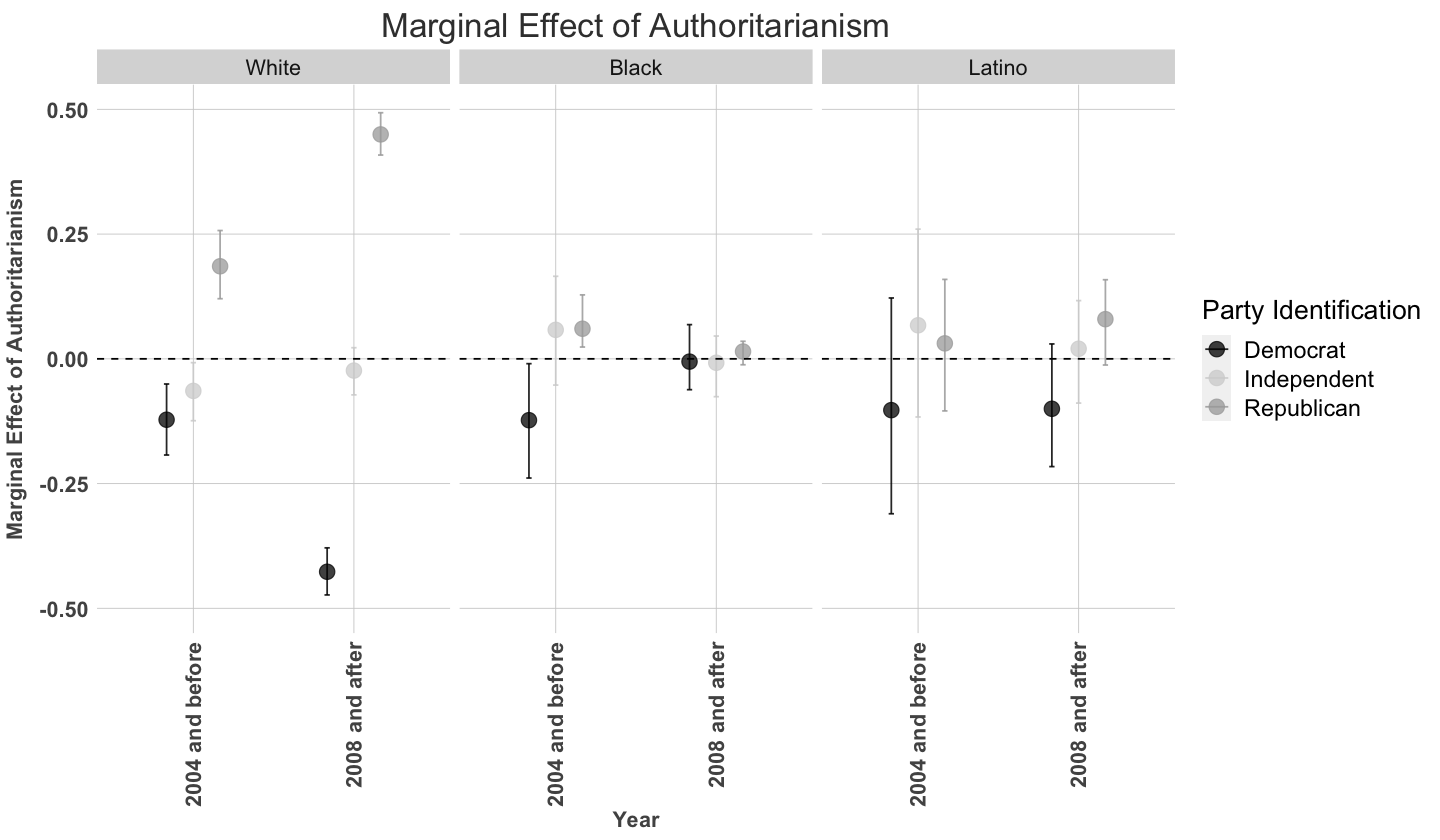

In [654]:
plot_data %>%
mutate(Race = firstL(race)) %>%
group_by(year, .category, Race) %>%
                                        mutate(min              = quantile(marginalEffect, 0.025)) %>%
                                        mutate(med              = quantile(marginalEffect, 0.50)) %>%
                                        mutate(max              = quantile(marginalEffect, 0.975)) %>%
                                        summarize(
                                            min = quantile(min, 0.025),
                                            med = quantile(med, 0.50),
                                            max = quantile(max, 0.975)) %>%
ggplot(aes(x = factor(year),
                  y = med, ymin=max,
                  ymax=min, colour = as.factor(.category), group = as.factor(.category)))+
    facet_grid(~factor(Race, levels=c('White', 'Black', 'Latino'))) +
  geom_point(size=4,  alpha = 0.75, position = position_dodge(width = 0.5)) +
  geom_errorbar(width = 0.10, alpha=0.85, position = position_dodge(width = 0.5)) +
  ggtitle("Marginal Effect of Authoritarianism") +
  scale_y_continuous("Marginal Effect of Authoritarianism", limits=c(-0.5,0.5)) +
  scale_x_discrete("Year") +
  geom_hline(yintercept = 0, colour = "black", linetype = "dashed") +
  scale_colour_manual(name="Party Identification", values=c("black", "lightgrey", "darkgrey")) +
  theme(
        plot.title=element_text(hjust=0.5,vjust=0.5,colour="#3C3C3C",size=20),
        axis.text.x=element_text(size=13,colour="#535353",face="bold", angle = 90, vjust = 0.5, hjust=1),
        axis.text.y=element_text(size=13,colour="#535353",face="bold"),
        axis.title = element_text(size=13,colour="#535353",face="bold"),
        axis.title.y=element_text(size=13,colour="#535353",face="bold",vjust=1.5),
        axis.ticks=element_blank(),
        strip.text.x = element_text(size = 13),
        panel.grid.major=element_line(colour="#D0D0D0",size=.25),
        panel.background=element_rect(fill="white"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16))

# ggplot(aes(x = factor(year),
#            y = marginalEffect,
#            colour = .category,
#            group = .category))+
#   stat_summary(fun.y ta = median_hilow, geom = "crossbar", color = "green") +

#   geom_point(size=1,  alpha = 0.75, position = position_dodge(width = 0.5)) +
#   facet_wrap(~race, ncol = 1, scales = "free_y") +
#   ggtitle("Republican Presidential Vote,\nBy Education") +
#   ggtheme +
#   scale_y_continuous("Marginal Effect of Authoritarianism", limits=c(-0.05,1)) +
#   scale_x_discrete("Year") +
#   geom_hline(yintercept = 0, colour = "black", linetype = "dashed") +
#   scale_colour_manual(name="College", values=c("darkgrey", "black", 'yellow'))

In [548]:

firstL(plot_data$race) %>%  table

.
 Black Latino  White 
  6000   6000   6000 